In [1]:
# 1) Imports
from trading_lib.imports import *
from trading_lib.trading_environment import DataManager, Optimizer, ReportManager, StrategyCollection, PerformanceAnalyzer, DATA_DIR, MAX_FILE_SIZE
from trading_lib.strategies   import MovingAverageCrossStrategy

In [2]:
# 2) Load your data (e.g. BTC-USD daily over the last 2 years)
dm = DataManager(data_dir=DATA_DIR, max_file_size=MAX_FILE_SIZE)
data = dm.load_data(
    symbols='BTC-USD',
    period='2y',
    interval='1d'
)

In [3]:
# 3) build a collection of every MA crossing variant
coll = StrategyCollection(strategy_cls=MovingAverageCrossStrategy)

In [4]:
# 4) backtest all and get equity curves and performance metrics
perf_df, equity_map = coll.backtest_and_performance_all(
    symbol          = "BTC-USD",
    period          = "2y",
    interval        = "1d",
    initial_capital = 10_000,
    transaction_cost= 0.0,
    stop_loss       = None,
    sort_by         = "Sharpe",
    ascending       = False
)

In [5]:
perf_df

,Total Return,Ann. Return,Ann. Vol,Sharpe,Max Drawdown,Win Rate,Profit Factor,Expectancy
MA 65/90,0.152679,0.050132,0.037146,1.335248,-0.013704,0.009563,11.440620,-0.006618
MA 15/100,0.160253,0.052502,0.039728,1.307543,-0.001656,0.009563,49.514412,-0.001330
MA 5/110,0.142663,0.046982,0.038138,1.222536,-0.000777,0.008197,175.371727,-0.000584
MA 50/120,0.132597,0.043797,0.035812,1.214562,0.000000,0.006831,NaN,0.000173
MA 95/120,0.162866,0.053318,0.044873,1.179616,-0.017969,0.009563,9.400821,-0.008829
...,...,...,...,...,...,...,...,...
MA 55/80,-0.181389,-0.066583,0.059540,-1.126261,-0.181389,0.004098,0.176534,-0.023500
MA 80/130,-0.083176,-0.029453,0.025950,-1.138812,-0.083176,0.000000,0.000000,-0.017168
MA 40/100,-0.091716,-0.032575,0.027103,-1.208105,-0.091716,0.001366,0.082270,-0.017238
MA 15/80,-0.117350,-0.042063,0.031895,-1.330971,-0.117350,0.001366,0.050260,-0.016199


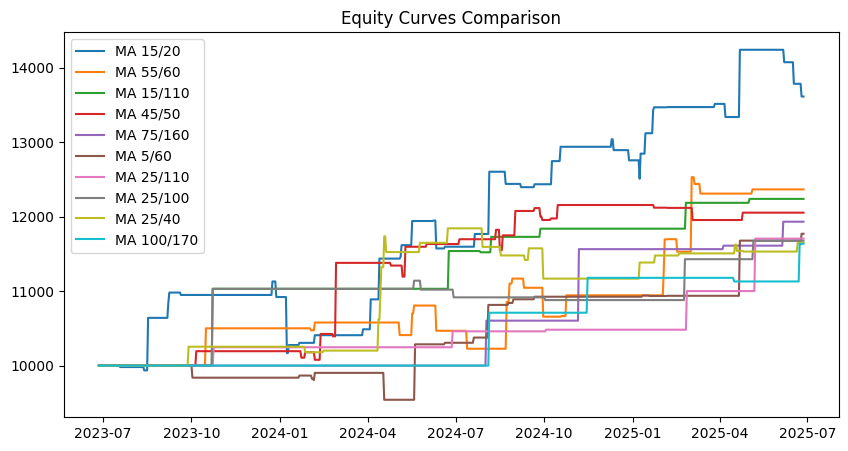

In [6]:
# 5) plot only the top 10 by Total Return
rm = ReportManager()
rm.plot_equity_curves(
    equity_dict    = equity_map,
    perf_df        = perf_df,
    top_n          = 10,
    top_n_metric   = 'Total Return'
)

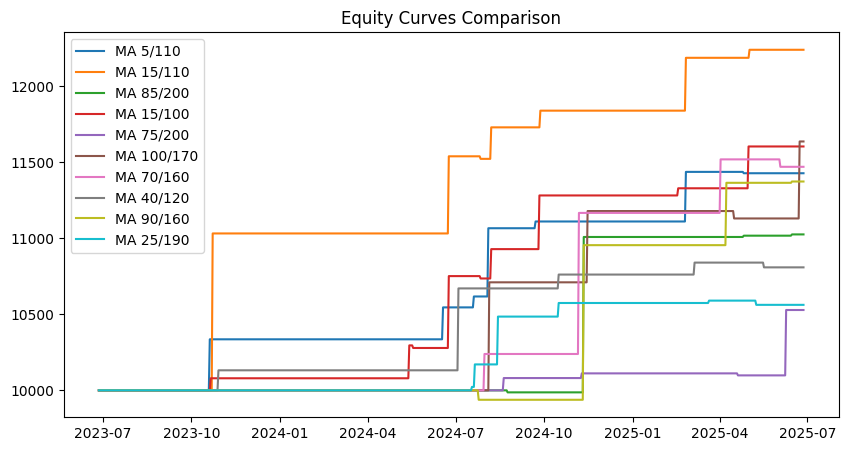

In [7]:
# 6) plot only the top 10 by Profit Factor
rm = ReportManager()
rm.plot_equity_curves(
    equity_dict    = equity_map,
    perf_df        = perf_df,
    top_n          = 10,
    top_n_metric   = 'Profit Factor'
)

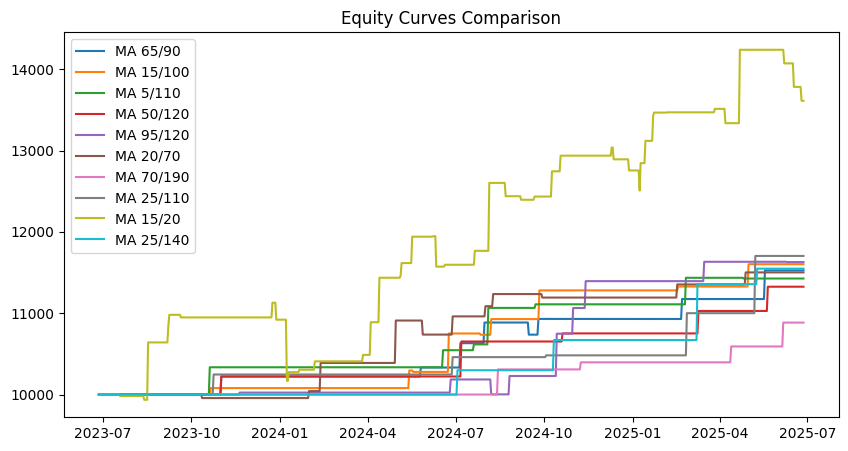

In [8]:
# 7) plot only the top 10 by Sharpe
rm = ReportManager()
rm.plot_equity_curves(
    equity_dict    = equity_map,
    perf_df        = perf_df,
    top_n          = 10,
    top_n_metric   = 'Sharpe'
)